<h1>Applied Data Science Capstone Part 2</h1>
<h2><i>Web Scraping</i></h2>

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [4]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")  #Request the following url
print(page) #Respone : 200 = Successful url load
doc = page.text #get the html of the url page

<Response [200]>


In [5]:
dic = {} #Empty dictionary to hold the whole information. It will be filled and be converted into a pandas dataframe later
postcode_list = []  #List to hold the Postcodes
borough_list = []  #List to hold the Boroughs
neighbourhood_list = []  ##List to hold the Neighbourhoods

In [6]:
soup = BeautifulSoup(doc, 'html.parser')  #Initialize a BeatifulSoup object to parse the doc
table = soup.find('tbody') #Get the table
data = table.find_all('td') #Get the table data as a list
print(data[0].text , data[1].text , data[2].text) #check the first row

M1A Not assigned Not assigned



In [7]:
data_rows = len(data)
x = range(0,int(data_rows),3) #create a range to iterate through the list , always getting the first item (PostCode) of every row 
for index in x:
    if (data[index+1].text != "Not assigned"):  #Assure that the row doesn't contain "Not aassigned" value
        #Then get each value into the apropriate list
        if data[index].text not in postcode_list: #If the postcode is not in the list , append the whole row
            postcode_list.append(data[index].text)
            borough_list.append(data[index+1].text)
            neighbourhood_list.append(data[index+2].text.replace('\n','')) #We get rid of the '\n' from every neighbourhood data
        else:  #If it the postcode is already in the list , find its index and add the additional neighborhood in the neighbourhood list (comma seperated)
            position = postcode_list.index(data[index].text)
            neighbourhood_list[position] += ", "
            neighbourhood_list[position] += data[index+2].text.replace('\n','')

In [8]:
#If a neighbourhood in neighbourhood_list has a 'Not assigned' value , replace it with the respective borough  name

filtered_neighbourhood_list = neighbourhood_list[:]
i = 0

for n in neighbourhood_list:
        if n == 'Not assigned':
            position = neighbourhood_list.index('Not assigned')
            filtered_neighbourhood_list[i] = borough_list[position]
        else:
            filtered_neighbourhood_list[i] = n
        i += 1

In [9]:
#Fill the dictionary 'dic' with the information
dic['Postcode'] = postcode_list
dic['Borough'] = borough_list
dic['Neighbourhood'] = filtered_neighbourhood_list

In [10]:
#Create the pandas dataframe
df = pd.DataFrame.from_dict(dic)

print(df.head())

  Postcode           Borough                     Neighbourhood
0      M3A        North York                         Parkwoods
1      M4A        North York                  Victoria Village
2      M5A  Downtown Toronto         Harbourfront, Regent Park
3      M6A        North York  Lawrence Heights, Lawrence Manor
4      M7A      Queen's Park                      Queen's Park


In [11]:
#Number of rows
print(df.shape[0])

103


<h2><i>Getting the Geographical Data</i></h2>

In [23]:
gdf = pd.read_csv('http://cocl.us/Geospatial_data') #Read the data csv
p = list(gdf['Postal Code']) #Get the data into lists
lat = list(gdf['Latitude'])
lon = list(gdf['Longitude'])

print(gdf.head())

  Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476
<class 'list'>


In [27]:
lat_list = [] #Create two new lists to hold the appended data
lon_list = []

for x in postcode_list:  #fill the new lists based on the postcodes in df
        position = p.index(x)
        lat_list.append(lat[position])
        lon_list.append(lon[position])

In [34]:
dic['Latitude'] = lat_list  #Append the new data in the previously created dictionary
dic['Longitude'] = lon_list

df = pd.DataFrame.from_dict(dic)  #Recreate the dataframe 

print(df.head())

  Postcode           Borough                     Neighbourhood   Latitude  \
0      M3A        North York                         Parkwoods  43.753259   
1      M4A        North York                  Victoria Village  43.725882   
2      M5A  Downtown Toronto         Harbourfront, Regent Park  43.654260   
3      M6A        North York  Lawrence Heights, Lawrence Manor  43.718518   
4      M7A      Queen's Park                      Queen's Park  43.662301   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494  


<h2>Apply KMeans Clustering</h2>

In [35]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

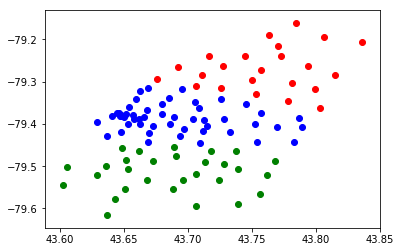

In [41]:
k = 3
x1 = df.loc[:,'Latitude':'Longitude']
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(x1)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

colors = ['blue','red','green','black']
y = 0

for x in labels:
    plt.scatter(x1.iloc[y,0],x1.iloc[y,1],color=colors[x])
    y += 1
    
plt.show()